# 1.

In [169]:
import pandas as pd
import numpy as np
from numpy import linalg as LA

## Reading Data

In [134]:
df = pd.read_csv('./housing.csv')

In [135]:
df.shape

(20640, 10)

## Cleaning Data

In [136]:
df = df.dropna()
df.shape

(20433, 10)

## One Hot Encoding

In [137]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [138]:
one_hot_encoding = pd.get_dummies(df['ocean_proximity'])
ocean_approximities = list(one_hot_encoding.keys())
for ocean_approximity in ocean_approximities:
    df[ocean_approximity] = one_hot_encoding[ocean_approximity]
df = df.drop(['ocean_proximity'], axis=1)

## Mean Normalization

In [139]:
df = (df-df.mean())/df.std()

## Splitting Data

In [140]:
msk = np.random.rand(len(df)) <= 0.7
train = df[msk]
test= df[~msk]

In [141]:
labels = train['median_house_value']
train.drop(['median_house_value'], axis=1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327281,1.051692,0.982139,-0.803793,-0.970301,-0.973296,-0.976809,2.345106,-0.890217,-0.682697,-0.015644,2.828592,-0.384177
1,-1.322290,1.042330,-0.606195,2.042080,1.348243,0.861318,1.670332,2.332575,-0.890217,-0.682697,-0.015644,2.828592,-0.384177
2,-1.332272,1.037649,1.855723,-0.535176,-0.825541,-0.819749,-0.843406,1.782896,-0.890217,-0.682697,-0.015644,2.828592,-0.384177
4,-1.337263,1.037649,1.855723,-0.461959,-0.611959,-0.758860,-0.628914,-0.013143,-0.890217,-0.682697,-0.015644,2.828592,-0.384177
5,-1.337263,1.037649,1.855723,-0.785946,-0.770959,-0.892993,-0.801554,0.087211,-0.890217,-0.682697,-0.015644,2.828592,-0.384177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20633,-0.977906,1.664888,-0.129695,-0.254662,-0.298707,-0.302634,-0.307177,-0.695871,-0.890217,1.464708,-0.015644,-0.353516,-0.384177
20634,-0.992879,1.702335,-0.050278,-0.139344,-0.339050,-0.338814,-0.406575,-0.083537,-0.890217,1.464708,-0.015644,-0.353516,-0.384177
20635,-0.758299,1.800633,-0.288528,-0.444570,-0.388886,-0.511774,-0.443196,-1.216697,-0.890217,1.464708,-0.015644,-0.353516,-0.384177
20636,-0.818192,1.805314,-0.844446,-0.887535,-0.920466,-0.943292,-1.008198,-0.692027,-0.890217,1.464708,-0.015644,-0.353516,-0.384177


In [142]:
labels

0        2.128767
1        1.313594
2        1.258152
4        1.172390
5        0.544334
           ...   
20633   -0.940475
20634   -0.780213
20635   -1.115465
20636   -1.124128
20637   -0.992452
Name: median_house_value, Length: 14347, dtype: float64

In [143]:
feature_no = train.shape[1]
feature_no

14

In [170]:
def gradient_descent(train, labels, learning_rate=0.01, iterations=1000, w= None, b = None, alpha=None):
    if w is None:
        w = np.random.rand(1, feature_no) #random weight
    if b is None:
        b = np.random.rand() #random bias
    N = len(train) #number of train data
    
    mse = 0
    mse_list = list()
    delta_w = np.zeros((1, feature_no))
    delta_b = 0
    for iter in range(iterations * N):
        data_index = iter % N
        x = train[data_index]
        label = labels[data_index]

        pred = w.dot(x)[0]
        f = label - (pred + b)
        
        delta_w -= learning_rate * (-2 * x.T * f / N)
        delta_b -= learning_rate * (-2 * f / N)
        if alpha:
            mse += f ** 2 + LA.norm(delta_w)
        else:
            mse += f ** 2
        # Update every epoch
        if iter % N == 0:
            w += delta_w
            b += delta_b
            permu = np.random.permutation(N)
            train = train[permu]
            labels = labels[permu]
            delta_w = np.zeros((1, feature_no))
            delta_b = 0
            mse_list.append(mse)
#             print("current loss: " , mse)
            mse = 0

    w = w + delta_w
    b = b + delta_b
    return w, b, mse_list

In [145]:
squared_error = 0
train_data = np.array(train)
w, b, mse_list = gradient_descent(train_data, np.array(labels), iterations=10)
#     squared_error += (labels[index] - weights.dot(x.T))[0] ** 2

current loss:  0.7553548074629521
current loss:  50445.1391750473
current loss:  46233.23946062383
current loss:  42486.874190249386
current loss:  39145.56170401554
current loss:  36157.34065902566
current loss:  33477.52303479193
current loss:  31067.633040264842
current loss:  28894.50394264565
current loss:  26929.509071846634


# 2.

In [171]:
w, b, mse_list = gradient_descent(train_data, np.array(labels), iterations=10, alpha=True)

# 3.

In [158]:
import matplotlib.pyplot as plt

**PS:** In the following cell, you can replace `test` with `train_data` to see how well our model works!

**TA Warning:** It is needed to be executed again. :))

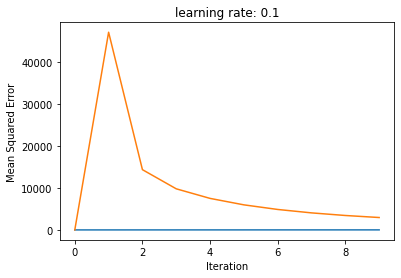

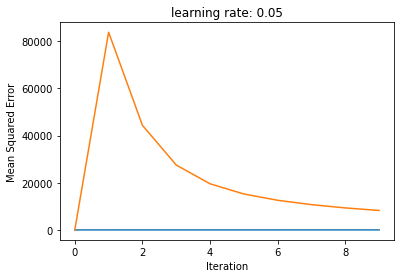

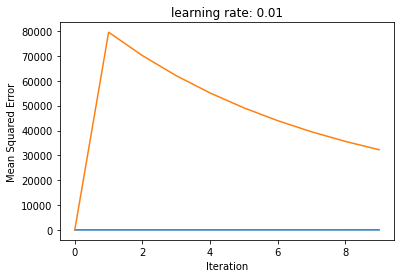

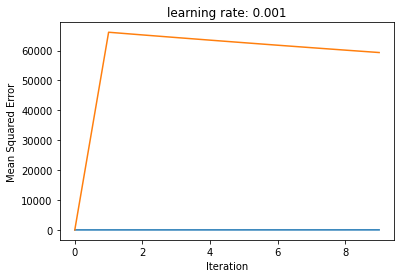

In [164]:
learning_rates = [0.1, 0.05, 0.01, 0.001]
for lr in learning_rates:
    plt.title('learning rate: {}'.format(lr))
    w, b, mse_list = gradient_descent(train_data, np.array(labels), learning_rate=lr, iterations=1000)
    points = list()
    for i, mse in enumerate(mse_list):
        points.append((i + 1, mse))
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.plot(points)
    plt.show()